In [1]:
import numpy as np

def euclidean_distance(vec1, vec2):
    return np.linalg.norm(vec1-vec2)

In [2]:
def manhattan_distance(vec1, vec2):
    vector_abs = np.abs(vec1-vec2)
    return np.sum(vector_abs)

In [3]:
def accuracy_generalization_error(predicted, actual):
    accuracy = np.sum(predicted == actual)
    return accuracy/len(actual), 1-(accuracy/len(actual))

In [4]:
def precision(true_pos, false_pos):
    return true_pos/(true_pos + false_pos)

def recall(true_pos, false_neg):
    return true_pos/(true_pos+false_neg)

def f1_score(prec, rec):
    return 2*((prec*rec)/(prec+rec))

In [5]:
def confusion_matrix(predicted, actual):
    tn = 0
    tp = 0
    fn = 0
    fp = 0
    for i in range(0, len(predicted)):
        if predicted[i] == actual[i] and actual[i] == 0:
            tn += 1
        elif predicted[i] == actual[i] and actual[i] == 1:
            tp += 1
        elif predicted[i] != actual[i] and actual[i] == 0:
            fp += 1
        elif predicted[i] != actual[i] and actual[i] == 1:
            fn += 1
            
    return np.array([[tn, fp],[fn, tp]])

In [6]:
def roc_curve(true_classes, class_probabilities):
    """Given true classes and class probabilities calculates fpr and tpr values and returns them as lists that can be used to construct a ROC curve"""
    true_classes, class_probabilities = np.asarray(true_classes) , np.asarray(class_probabilities)
    tpr_values=[]
    fpr_values=[]
    for threshold in range(100):
        predicted_classes=(class_probabilities > float(threshold/100.)).astype(int)
        fpr=np.sum(predicted_classes[np.where(predicted_classes == 1 )]  != true_classes[np.where(predicted_classes == 1 )])/true_classes[np.where(true_classes == 0 )].shape[0]
        tpr=np.sum(predicted_classes[np.where(predicted_classes == 1 )]  == true_classes[np.where(predicted_classes == 1 )])/true_classes[np.where(true_classes == 1 )].shape[0]
        fpr_values.append(fpr)
        tpr_values.append(tpr)
    return fpr_values,tpr_values

In [7]:
def auc(true_classes, class_probabilities):
    '''Calculates area under the roc curve by calling the roc curve function to calculate tpr and fpr'''
    x,y=roc_curve(true_classes, class_probabilities)
    auc=abs(np.trapz(y,x, axis=-1))
    return auc

In [8]:
class KnnModel:

    def __init__(self):
        pass
    
    def fit(self, training_features, training_labels, k, distance_f, kwargs):
        self.training_features = training_features
        self.training_labels = training_labels
        self.k = k
        self.distance_f = distance_f
        self.kwargs = kwargs
        return
    
    def predict(self, test_features, weight_option=None):
        distances = np.array([])
        min_distances = np.array([])
        test_labels = np.array([])
        # loop through array of test features
        for i in range(0, len(test_features)):
            # loop through training features and find distances 
            for j in range(0, len(self.training_features)):
                distances = np.append(distances, euclidean_distance(test_features[i], self.training_features[j]))                            
            # find max distance to replace min distances
            max_distance = np.amax(distances)                 
            test_k_labels = np.array([])
                                      
            for l in range(0, self.k):
                # find index of min value and append it to array
                min_d = np.argmin(distances)
                np.append(test_k_labels, self.training_labels[min_d])
                distances[min_d] = max_distance
            # find most frequent value and add it to test labels
            test_labels = np.append(test_labels, np.bincount(test_labels).argmax())
        # return predictions
        return test_labels
    
    def test(self):
        return self.__dict__

In [9]:
import pandas as pd

df = pd.read_csv('./datasets/winequality-white.csv',delimiter=';')

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [11]:
target = []
for row in df['quality']:
    if row > 5:
        target.append(1)
    else:
        target.append(0)

In [14]:
df = df.sample(frac=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3992,6.7,0.190,0.32,3.70,0.041,26.0,76.0,0.99173,2.90,0.57,10.5,7
4066,7.1,0.440,0.27,8.40,0.057,60.0,160.0,0.99257,3.16,0.36,11.8,6
1570,6.6,0.300,0.74,4.60,0.041,36.0,159.0,0.99460,3.21,0.45,9.9,5
2537,5.9,0.280,0.14,8.60,0.032,30.0,142.0,0.99542,3.28,0.44,9.5,6
4897,6.0,0.210,0.38,0.80,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6
2330,7.5,0.380,0.29,12.70,0.050,25.0,209.0,0.99860,3.25,0.59,9.3,6
3509,6.4,0.260,0.25,10.70,0.046,66.0,179.0,0.99606,3.17,0.55,9.9,6
4243,6.8,0.260,0.26,2.00,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,6
2799,6.7,0.160,0.37,1.30,0.036,45.0,125.0,0.98964,3.19,0.51,12.4,7
1495,7.6,0.290,0.49,9.60,0.030,45.0,197.0,0.99380,3.13,0.38,12.3,7


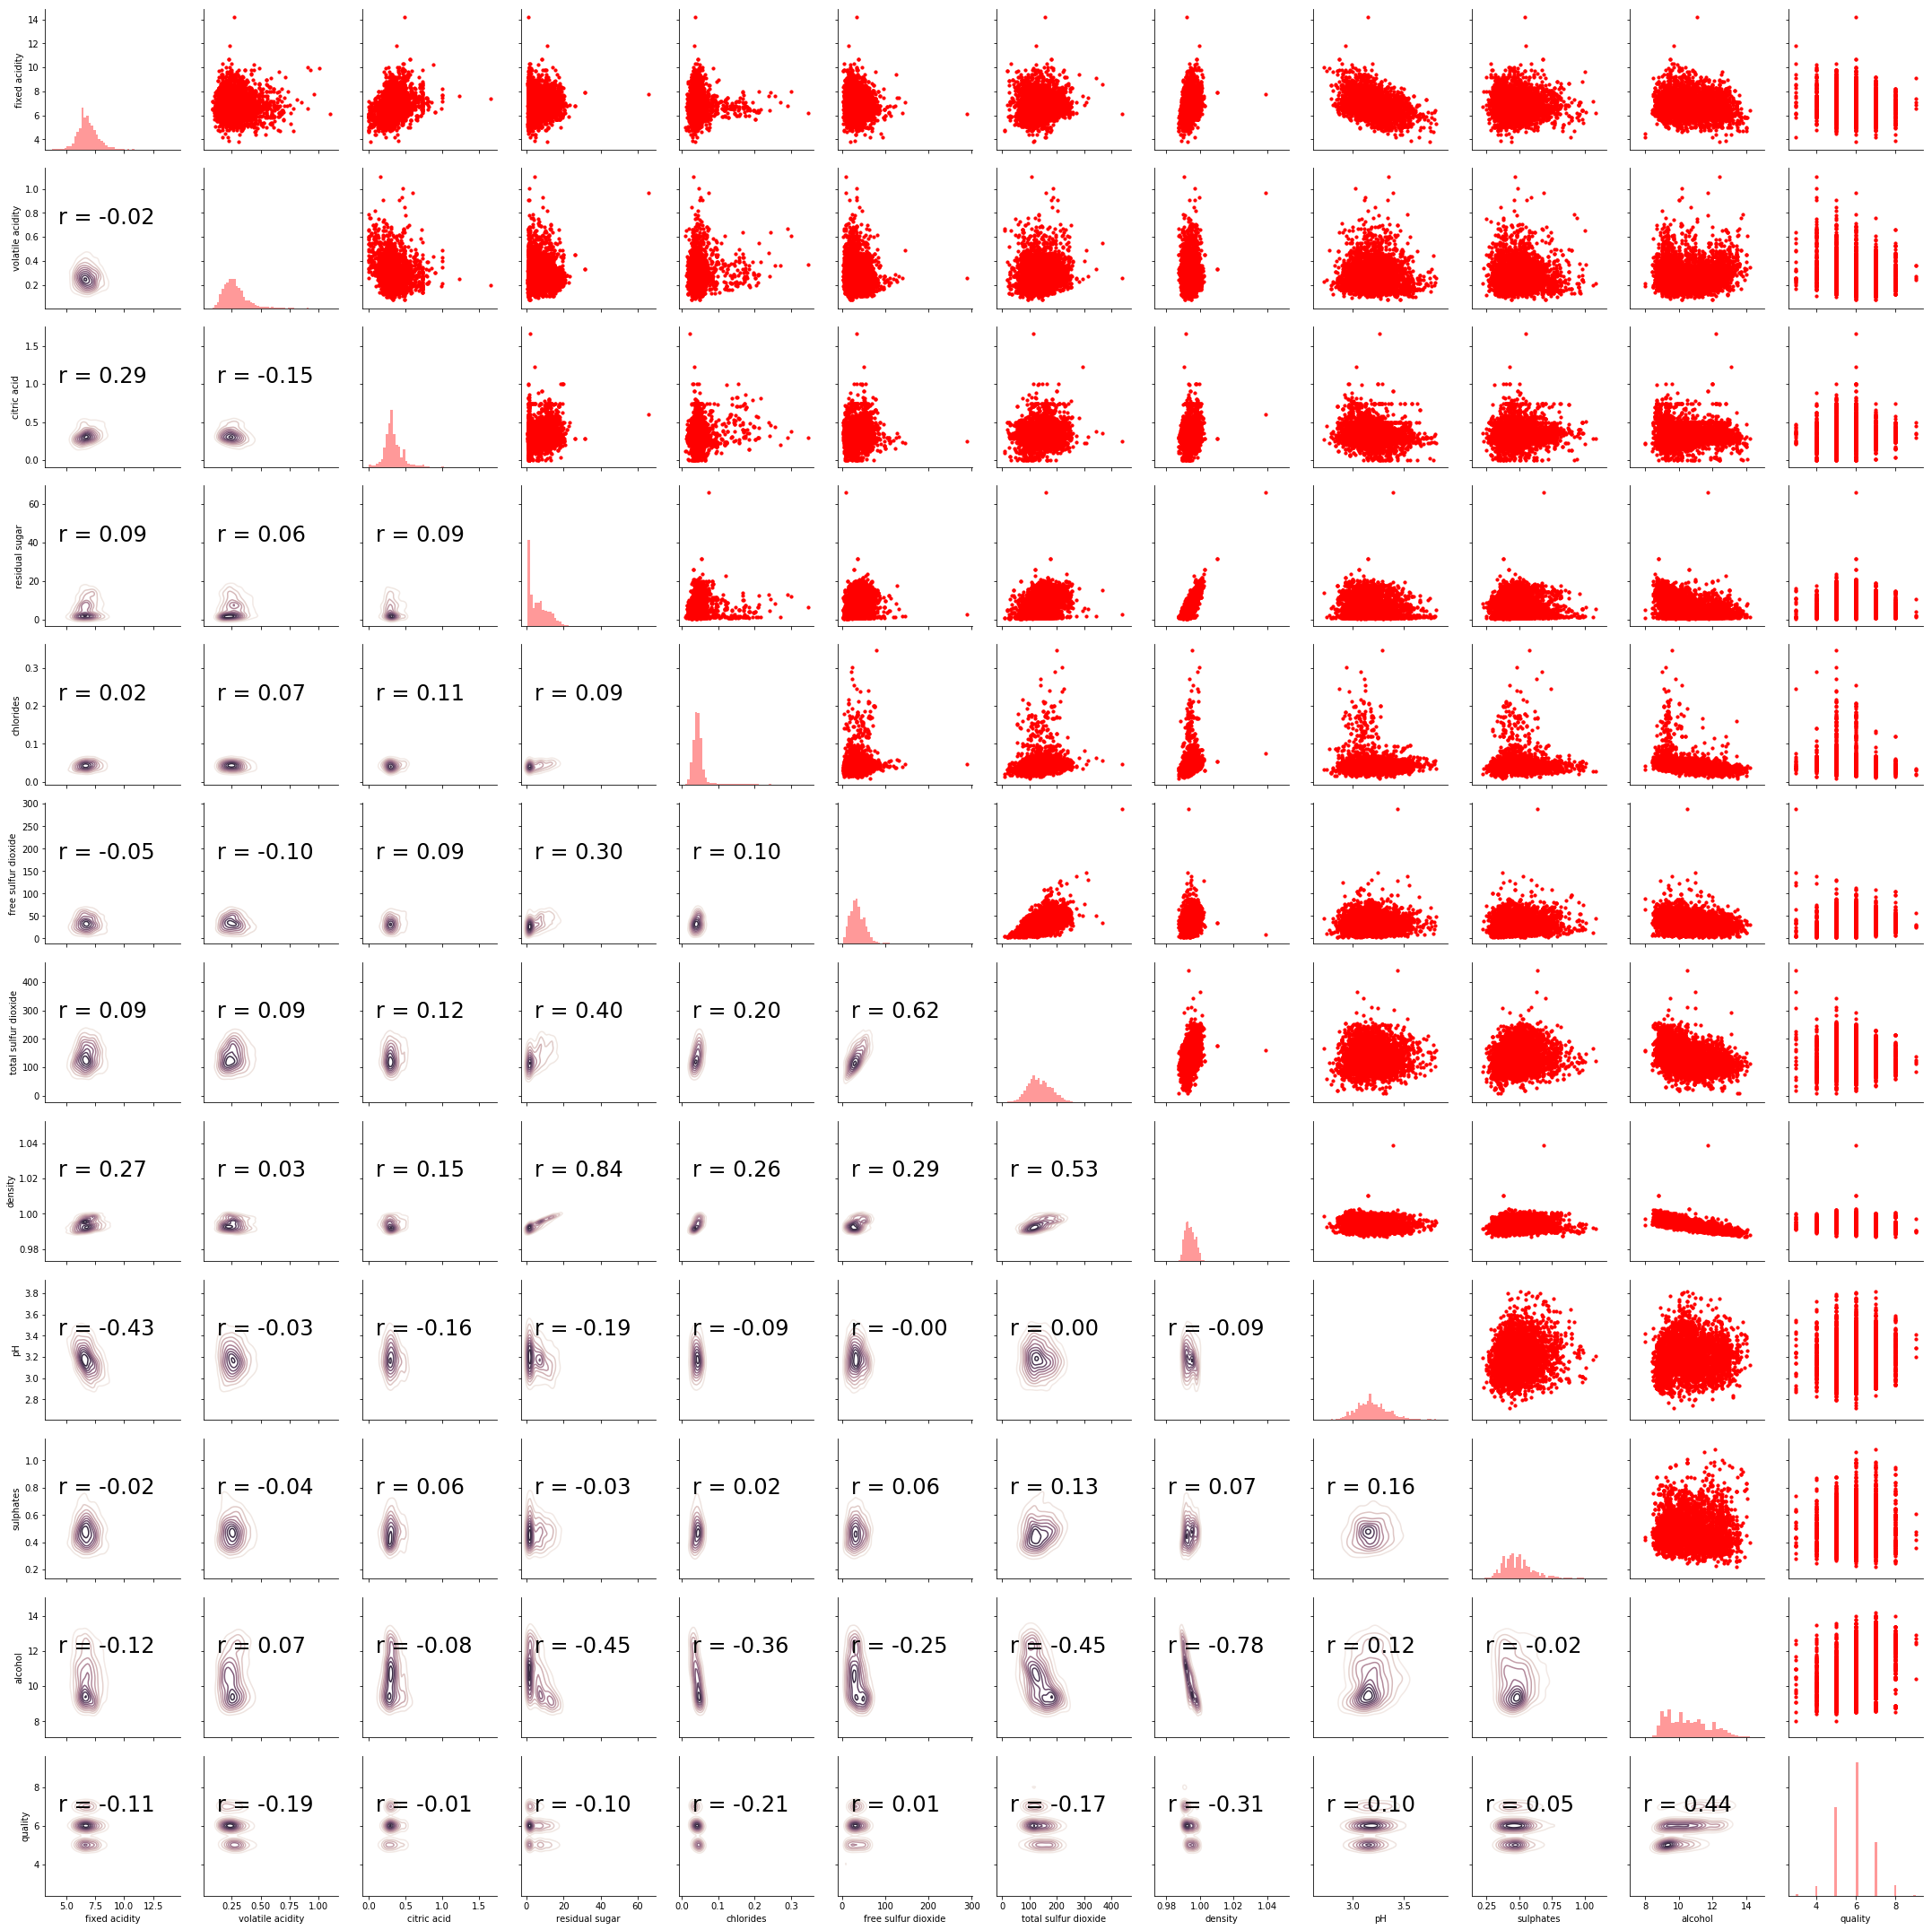

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)

cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [16]:
df = df.drop(columns=['density', 'fixed acidity', 'alcohol', 'pH'])

In [22]:
def partition(feature_matrix, target_vector, t):
    last_index_taken = len(feature_matrix) - int(round(len(feature_matrix) * t))
    X_train = np.take(feature_matrix, range(0, last_index_taken))
    X_test = np.take(feature_matrix, range(last_index_taken, len(feature_matrix)))
    y_train = np.take(target_vector, range(0, last_index_taken))
    y_test = np.take(target_vector, range(last_index_taken, len(target_vector)))
    return X_train, X_test, y_train, y_test